In [1]:
import json

In [2]:
f = open('iot.json')

# returns JSON object as 
# a dictionary
data = json.load(f)

# Iterating through the json
# list
for i in data['Entries']:
    print(data['Entries'][i]['wind'])

#close
f.close()

54
93
30
15
87
84
92
19
79
59


In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('df.csv', delimiter=',')
data.info()
len(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 27 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   index                                                  464 non-null    int64  
 1   Data                                                   464 non-null    object 
 2   Hora                                                   464 non-null    object 
 3   PRECIPITACIO TOTAL, HORARIO (mm)                       464 non-null    float64
 4   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  464 non-null    float64
 5   PRESSIO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        464 non-null    float64
 6   PRESSIO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       464 non-null    float64
 7   RADIACAO GLOBAL (Kj/m)                                 464 non-null    int64  
 8   TEMPERATURA DO AR - BULBO SECO, HORARIA (C)       

464

In [5]:
data["VENTO, VELOCIDADE HORARIA (m/s)"]

0      0.4
1      0.3
2      1.7
3      3.1
4      1.2
      ... 
459    2.5
460    1.7
461    0.3
462    1.3
463    1.4
Name: VENTO, VELOCIDADE HORARIA (m/s), Length: 464, dtype: float64

In [6]:
import numpy as np

In [7]:
L = np.array([0,0, 0], dtype=int)

L = np.vstack((L,[1,2,3]))
L

array([[0, 0, 0],
       [1, 2, 3]])

In [8]:
def csv_to_array(path):
    L = np.array([0,0,0])
    data = pd.read_csv(path, delimiter=',')
    for i in range(0,len(data)):
        L= np.vstack((L,[data["TEMPERATURA DO AR - BULBO SECO, HORARIA (C)"][i] , data["UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)"][i] , data["VENTO, VELOCIDADE HORARIA (m/s)"][i] ]))
    L = np.delete(L, (0), axis=0)
    return L

In [9]:
a = csv_to_array("df.csv")

In [10]:
a

array([[25.7, 91. ,  0.4],
       [24.9, 93. ,  0.3],
       [29.1, 83. ,  1.7],
       ...,
       [24.3, 93. ,  0.3],
       [27.5, 79. ,  1.3],
       [31. , 60. ,  1.4]])

In [11]:
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

C:\Users\Alex\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Alex\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt

<AxesSubplot:>

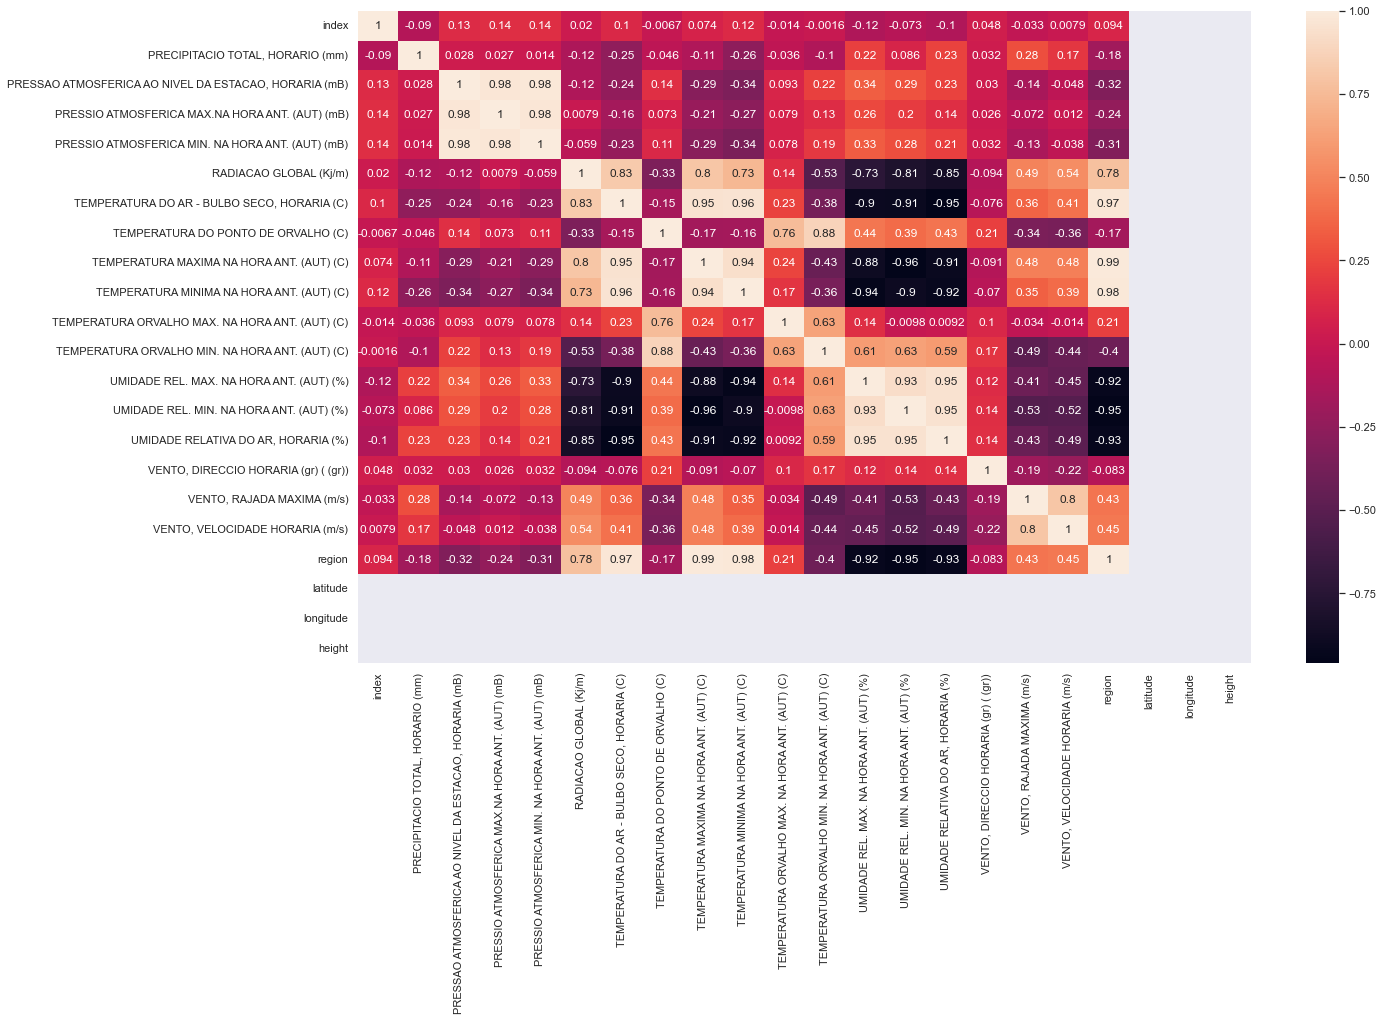

In [13]:
sns.set(rc = {'figure.figsize':(20,12)})
sns.heatmap(data.corr(), annot = True, fmt='.2g')

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error



X = data[["UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)", "VENTO, VELOCIDADE HORARIA (m/s)"]].values
y = data["TEMPERATURA DO AR - BULBO SECO, HORARIA (C)"].values

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.20, random_state=0)



In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression


reg = LinearRegression().fit(X_t, y_t)
reg.score(X_t, y_t)

reg.coef_

reg.intercept_

out = reg.predict(X_test)


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(X_t, y_t)

out2 = regr.predict(X_test)

In [48]:
mean_squared_error(y_test, out2)

0.8475171063410324

In [30]:
regr.predict(np.array([28.9,1.1]).reshape(1,-1))

array([30.945488])

In [31]:
import joblib
joblib.dump(regr, 'temperature_regr.pkl', compress=9)

['temperature_regr.pkl']

In [19]:
len(data)

464

In [61]:
X = data[["TEMPERATURA DO AR - BULBO SECO, HORARIA (C)", "UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)", "VENTO, VELOCIDADE HORARIA (m/s)"]][0:463].values
y = data["TEMPERATURA DO AR - BULBO SECO, HORARIA (C)"][1:464].values

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.20, random_state=0)



In [62]:
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(X_t, y_t)

out3 = regr.predict(X_test)

In [63]:
joblib.dump(regr, "next_day_regr.cls")

['next_day_regr.cls']

In [64]:

mean_squared_error(y_test, out3)

4.5036812743568255